In [1]:
import sympy as sym
from sympy import I, pi, oo, sqrt, sin, cos, exp

import numpy as np
from numpy import linalg 

import matplotlib.pyplot as plt
%matplotlib inline

## Exercise 1:
Calculate the first 10 moments of N(0,1)

In [2]:
## Calculating the first 10 moments of N(0,1) using the definition of m_n

x, k = sym.symbols('x k')

p_x = 1/sqrt(2*pi)*exp(-x**2/2)

for n in range(1,11):
    i = sym.integrate(p_x*x**n, (x, -oo, oo) )
    print('m_{:} = {:}'.format(n, i))

m_1 = 0
m_2 = 1
m_3 = 0
m_4 = 3
m_5 = 0
m_6 = 15
m_7 = 0
m_8 = 105
m_9 = 0
m_10 = 945


In [3]:
## Calculating the first 10 moments of N(0,1) using the characteristic function

characteristic_func =  sym.exp(-k**2/2)

for n in range(1,11):    
    expr = (I)**n * sym.diff(characteristic_func, k,n)
    print('m_{:} = {:}'.format(n,expr.subs(k, 0)))

m_1 = 0
m_2 = 1
m_3 = 0
m_4 = 3
m_5 = 0
m_6 = 15
m_7 = 0
m_8 = 105
m_9 = 0
m_10 = 945


## Exercise 2:
Generalize the addition law for $S = \sum X_i\cdot a_i$ where $X_i = N(\mu_i, \sigma_i)$, $a_i$ = weight

 Let $X_1, X_2, ..., X_N$ be independent random variable with normal distribution. We define a new random variable $X$:
 $$S = a_i\cdot X_1+ a_2\cdot X_2+...a_N\cdot X_N$$
 
 The probability distribution of $S$ is the convolution of probability distributions $P_1(x_1),...,P_N(x_N)$:
 
 $$ P(s) = \int P_1(x_1)\cdot P_2(x_2)\cdot ... \cdot P_{N-1}(x_{N-1})\cdot P_N(s-a_1x_1-...-a_{N-1}x_{N-1})ds$$
 
 The characteristic function of P(x) is equal to:
 $$\hat{P}(x) =  \int_{-\infty}^\infty  ds\cdot  P_1(x_1)\cdot P_2(x_2)\cdot ... \cdot P_{N-1}(x_{N-1})\cdot P_N(s-a_ix_1-...-a_{N-1}x_{N-1})e^{iks} $$

$$\hat{P}(x) = e^{ik(a_1\mu_1+a_2\mu_2+...+a_N\mu_N)} e^{-\frac{1}{2}k^2(a_1^2\sigma_1^2+...+a_N^2\sigma_N^2)} = e^{ik\mu}e^{-\frac{1}{2}k^2\sigma^2}$$

 Taking the inverse Fourier transform we retrieve a normal distribution:
 
 $X \sim N(\mu,\sigma)$ where: $\mu = \sum_{i=1}^N a_i\mu_i$  and  $\sigma^2 = \sum_{i=1}^N a_i^2\sigma^2_i$.
 
 
 

##  Exercise 1:
(from  homework set 3)

In [4]:
M = np.random.normal(loc = 0, scale = 2, size = (500,500))
X = 0.5 * (M + M.transpose())

/home/neofelia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


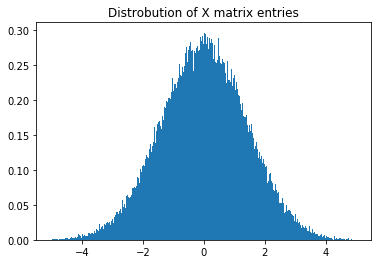

In [5]:
plt.title('Distrobution of X matrix entries')
plt.hist(np.resize(X, -1), bins = 500, range=(-5,5), normed = True) ;

In [6]:
def GOE(n,m):
    
    eigenval_tab =  []

    for i in range(n):
        M = np.random.normal(loc = 0, scale = 2, size = (m,m))
        X = (M + M.transpose())/(2*n)
        w,v = linalg.eig(X)
        eigenval_tab.append(w)

    eigenval_tab = np.matrix(eigenval_tab)
    eigenval_tab.resize(n*m,1)
    
    return eigenval_tab

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.34 µs


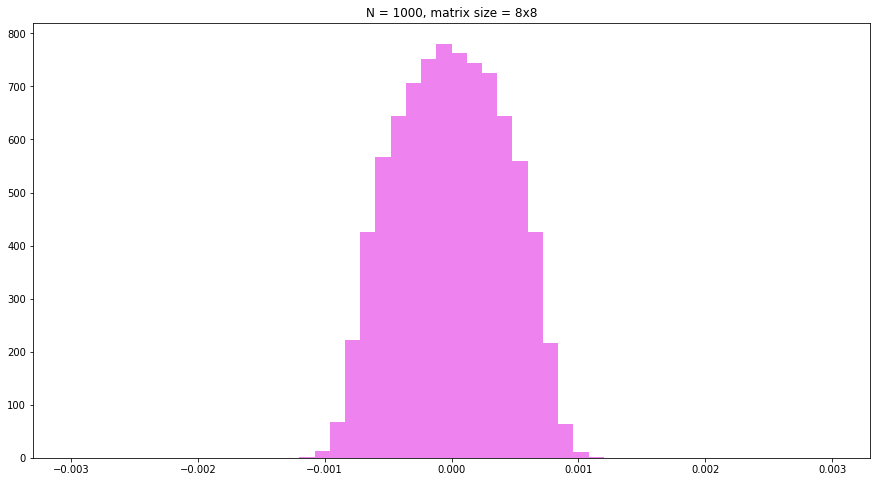

In [7]:
%time

eigenval_tab =  GOE(n=10000,m=8)
plt.figure(figsize=(15,8))
plt.title('N = 1000, matrix size = 8x8')
plt.hist(eigenval_tab, bins = 50, range=(-0.003, 0.003), density=True, color = 'violet') ;

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 9.3 µs


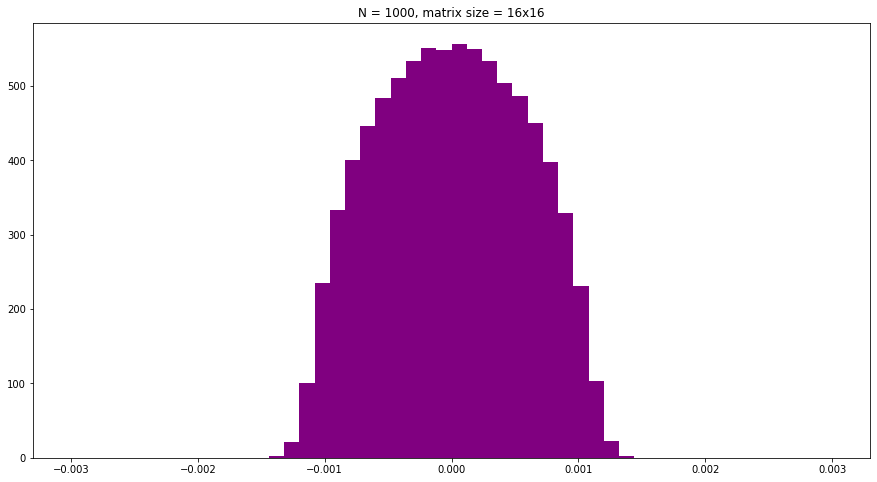

In [8]:
%time

eigenval_tab =  GOE(n=10000,m=16)


plt.figure(figsize=(15,8))
plt.title('N = 1000, matrix size = 16x16')
plt.hist(eigenval_tab, bins = 50, range=(-0.003, 0.003), density=True, color = 'purple') ;

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs


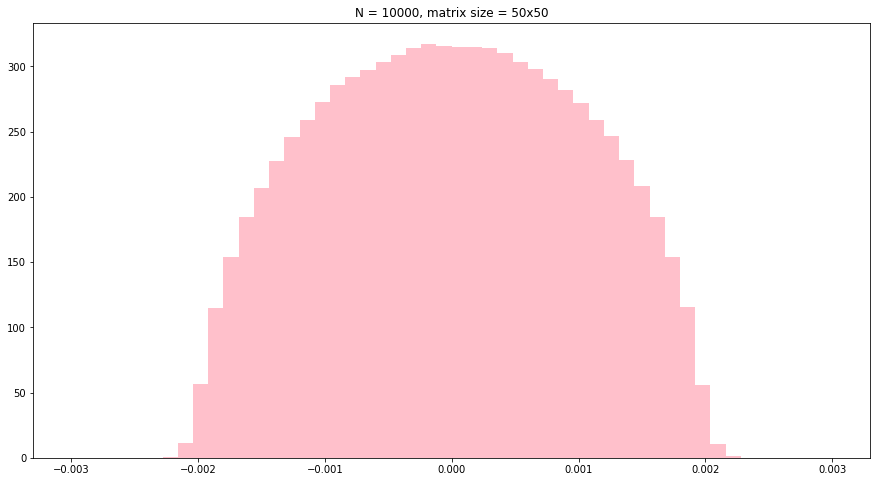

In [10]:
%time

eigenval_tab =  GOE(n=10000,m=50)

plt.figure(figsize=(15,8))
plt.title('N = 10000, matrix size = 50x50')
plt.hist(eigenval_tab, bins = 50, range=(-0.003, 0.003), density=True, color = 'pink') ;